# Import Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# import knn classifier
from sklearn.neighbors import KNeighborsClassifier
# import pipeline creator
from sklearn.pipeline import make_pipeline
# import metrics
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [19]:
# Load Data

In [3]:
# load the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# view the shape of the dataset
mnist.data.shape


(70000, 784)

## prepare the data

In [4]:
# Arrange data into features matrix & target vector
X = mnist.data
y = mnist.target

In [5]:
# Validation Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [6]:
# make and fit a pipe

knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [7]:
# Predict 
train_preds = knn_pipe.predict(X_train)
test_preds = knn_pipe.predict(X_test)

In [8]:
# Evaluate  model - this is accuracy
print('Accuracy of Train set', accuracy_score(y_train, train_preds))
print('Accuracy of Test set', accuracy_score(y_test, test_preds))

Accuracy of Train set 0.9625904761904762
Accuracy of Test set 0.9442285714285714


## Find best KNeighbors model

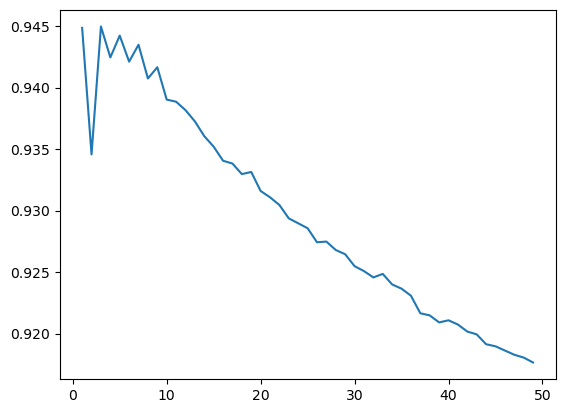

Best K value is 3 
with 0.9449714285714286 accuracy on the test set


In [24]:
krange = range(1, 50)
test_accuracies = []
bestacc = 0
bestk = 0
for k in krange:
  #find accuracy for each k
  pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
  pipe.fit(X_train, y_train)
  acc = accuracy_score(y_test, pipe.predict(X_test))
  #if accuracy for this k is better than previous accuracies, set bestk = k
  if acc > bestacc:
    bestacc = acc
    bestk = k

  test_accuracies.append(acc)

#plot accuracies over K
plt.plot(krange, test_accuracies, label='Test K Scores')
plt.show()

#print best k and best accuracy
print(f'Best K value is {bestk} \nwith {bestacc} accuracy on the test set')

## PCA Model

In [10]:
#x_scaled = StandardScaler().fit_transform(mnist.data)
#x_scaled

In [11]:
#pca = PCA()
#pca_df = pca.fit_transform(x_scaled)

In [12]:
# Create a scaler
scaler = StandardScaler()
# Create a PCA object that will retain 95% of the variance when transforming
pca = PCA(n_components=0.95)
# Combine the scaler and the PCA in a pipeline.
pipe = make_pipeline(scaler, pca)
# Transform the training data and check shape of new features after applying PCA
pipe.fit_transform(X_train)

array([[ -2.43336393,  -4.97226619,   2.22305227, ...,  -0.35642998,
         -0.26430805,   0.16919625],
       [ -4.26863722,  -1.25481969,   6.9851188 , ...,  -0.21683656,
          0.31639462,   0.04447375],
       [  4.41421515, -11.74118614,  -2.91896097, ...,   0.05455381,
         -0.12083639,   0.50879022],
       ...,
       [ -8.34031769,  -1.2239553 ,   2.02452836, ...,  -0.08314796,
         -0.55998957,  -0.12466435],
       [ 10.47035711,  -9.04170739,  -2.18982649, ...,  -0.42528394,
         -0.02999969,  -0.03885701],
       [ 10.54023438, -12.40911822,   2.85846299, ...,  -0.78242252,
         -0.37889057,   0.22626387]])

# Make time predictions using KNN without PCA 

In [13]:
%%time
# Create and fit a KNN model WITHOUT PCA.
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 516 ms
Wall time: 533 ms


KNeighborsClassifier()

In [14]:
%%time
# Make predictions and evaluate the model using classification_report
predictions = knn.predict(X_test)
predictions

CPU times: total: 1min 54s
Wall time: 17.6 s


array(['8', '4', '8', ..., '5', '8', '2'], dtype=object)

In [15]:
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1714
           1       0.95      1.00      0.97      1977
           2       0.98      0.96      0.97      1761
           3       0.97      0.96      0.96      1806
           4       0.97      0.97      0.97      1587
           5       0.97      0.96      0.97      1607
           6       0.98      0.99      0.98      1761
           7       0.96      0.97      0.97      1878
           8       0.99      0.93      0.96      1657
           9       0.95      0.96      0.95      1752

    accuracy                           0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500



# Make time predictions with PCA


In [16]:
%%time
# Create and fit a KNN model WITH PCA.
knn = KNeighborsClassifier()
pca = PCA()

knnpca = make_pipeline(pipe, knn)

knnpca.fit(X_train, y_train)

CPU times: total: 14.4 s
Wall time: 6.1 s


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [17]:
%%time
# Make predictions and evaluate the model using classification_report
predictions2 = knnpca.predict(X_test)

print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1714
           1       0.96      0.99      0.97      1977
           2       0.95      0.94      0.94      1761
           3       0.94      0.94      0.94      1806
           4       0.94      0.94      0.94      1587
           5       0.95      0.93      0.94      1607
           6       0.96      0.98      0.97      1761
           7       0.94      0.93      0.94      1878
           8       0.97      0.90      0.93      1657
           9       0.91      0.93      0.92      1752

    accuracy                           0.95     17500
   macro avg       0.95      0.95      0.95     17500
weighted avg       0.95      0.95      0.95     17500

CPU times: total: 57.5 s
Wall time: 9.57 s
